# Введение:

## Информация о датасете

Датасет - https://www.kaggle.com/datasets/abhijitdahatonde/real-world-smartphones-dataset

В данном датасете собрана полная информация обо всех новейших смартфонах, доступных на рынке по состоянию на текущий момент времени. Датасет был создан с помощью веб-скраппинга интернет-ресурсов с целью сбора точной и актуальной информации о различных моделях смартфонов, их технических характеристиках, возможностях и ценах.

## Основная цель:

1. Найти закономерности в формировании цены
2. Построить модель, которая сможет прогнозировать цену.

## Задачи:

1. Загрузка и предобработка данных

2. Описательный анализ данных, просмотр данных и вывод статистики

3. Построение необходимых графиков для анализа данных

4. Промежуточный отчет-вывод по исследованию

5. Определение модели машинного обучения

6. Создать несколько моделей для прогнозирования целевого признака и выбрать наилучшую модель, опираясь на валидацию

7. Сделать прогноз для тестовой выборки

8. Привести метрику, с помощью которой можно будет оценивать работу модели

9. Сделать вывод о работе модели и метриках.

# Импорт данных и быстрый анализ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as m
import seaborn as sns

from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LinearRegression
from sklearn.impute import  SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from phik import  report


Загрузим csv файл и сделаем из него DataFrame

In [30]:
df = pd.read_csv("./smartphones.csv")

In [73]:
display(df)

,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,10.571317,7.3,0,bionic,6.0,2.65,3110.0,0,NaN,4,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,10.757903,7.5,0,bionic,6.0,2.65,3110.0,0,NaN,4,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,11.607335,7.7,0,bionic,6.0,2.65,3500.0,1,18.0,4,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,10.858999,7.4,1,bionic,6.0,3.10,NaN,0,NaN,4,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,10.933107,7.5,1,bionic,6.0,3.10,NaN,0,NaN,4,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,9.546813,7.5,0,snapdragon,8.0,2.30,5020.0,1,18.0,4,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,9.577757,7.7,0,snapdragon,8.0,2.30,5020.0,1,18.0,4,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,9.710570,8.0,0,snapdragon,8.0,2.30,5020.0,1,33.0,6,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,9.903488,8.2,1,snapdragon,8.0,3.20,4200.0,1,55.0,6,128,6.90,120,4,android,50.0,16.0,1,2460,1080


Посмотрим на типы данных в DF

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

Посмотрим информацию из describe

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,980.0,32520.504082,39531.812669,3499.00,12999.00,19994.50,35491.50,650000.00
avg_rating,879.0,7.825825,0.740285,6.00,7.40,8.00,8.40,8.90
5G_or_not,980.0,0.560204,0.496616,0.00,0.00,1.00,1.00,1.00
num_cores,974.0,7.772074,0.836845,4.00,8.00,8.00,8.00,8.00
processor_speed,938.0,2.427217,0.464090,1.20,2.05,2.30,2.84,3.22
battery_capacity,969.0,4817.748194,1009.540054,1821.00,4500.00,5000.00,5000.00,22000.00
fast_charging_available,980.0,0.854082,0.353205,0.00,1.00,1.00,1.00,1.00
fast_charging,769.0,46.126138,34.277870,10.00,18.00,33.00,66.00,240.00
ram_capacity,980.0,6.560204,2.744378,1.00,4.00,6.00,8.00,18.00
internal_memory,980.0,141.036735,107.134516,8.00,64.00,128.00,128.00,1024.00


Посмотрим на сам DF

In [33]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


Посмотрим уникальные значения каждого столбца

In [34]:

df.nunique()

brand_name                    46
model                        980
price                        379
avg_rating                    30
5G_or_not                      2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
os                             3
primary_camera_rear           18
primary_camera_front          19
extended_memory_available      2
resolution_height             65
resolution_width              40
dtype: int64

# Подготовка  данных

Найдем выбросы используя "Ящики с усами" и "График рассеяния". Кроме категориальных признаков.

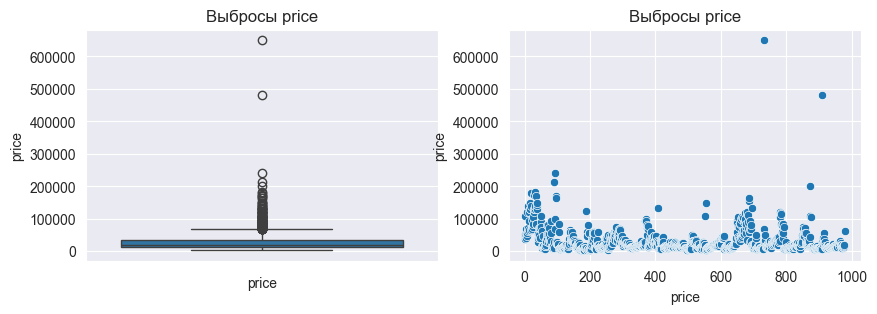

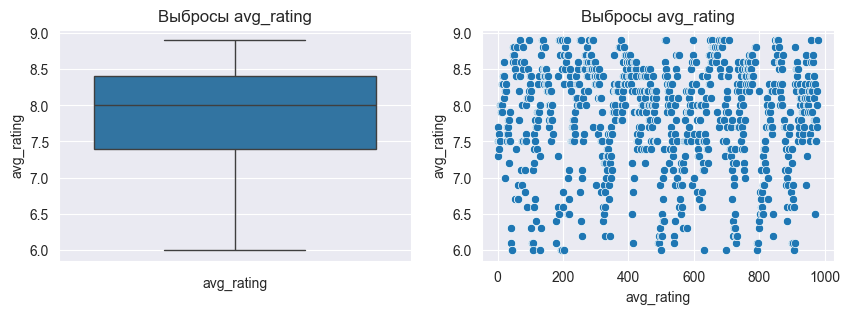

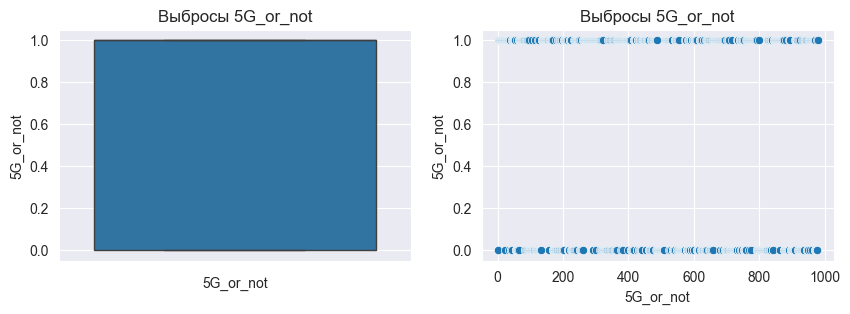

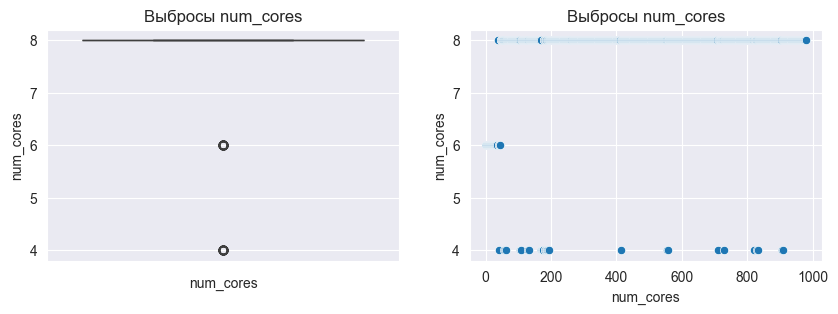

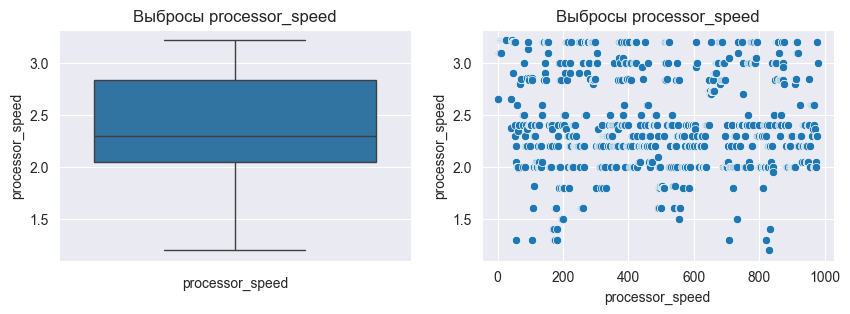

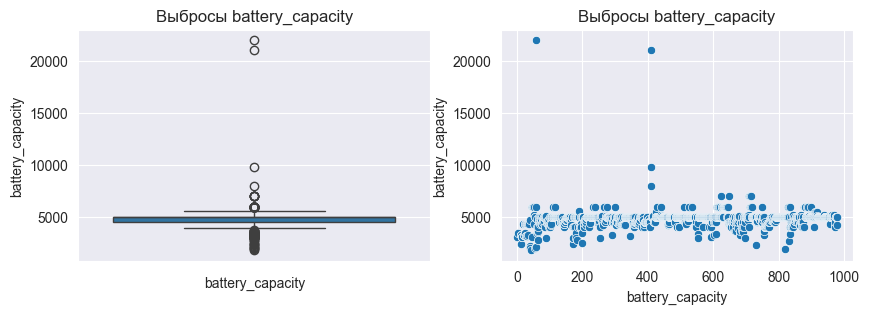

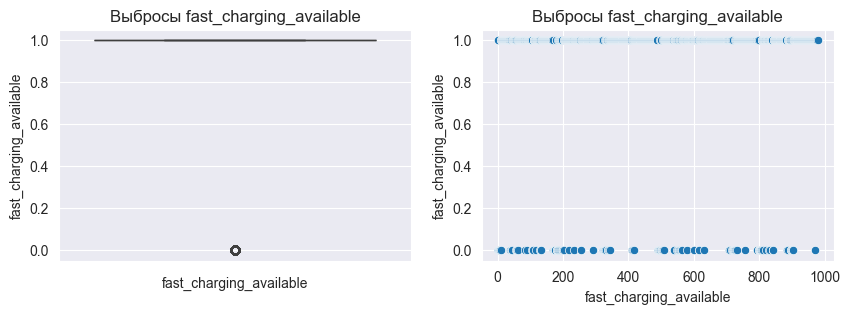

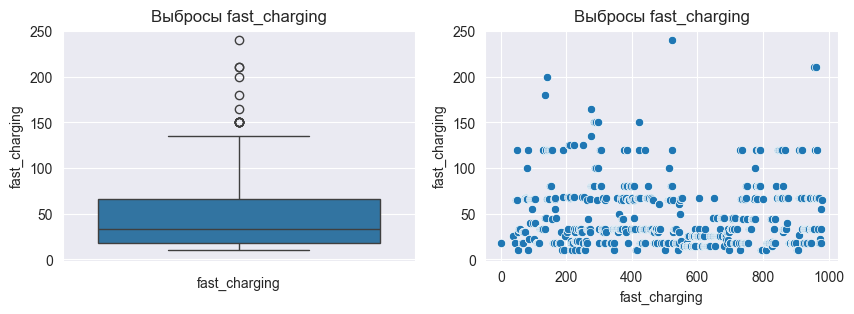

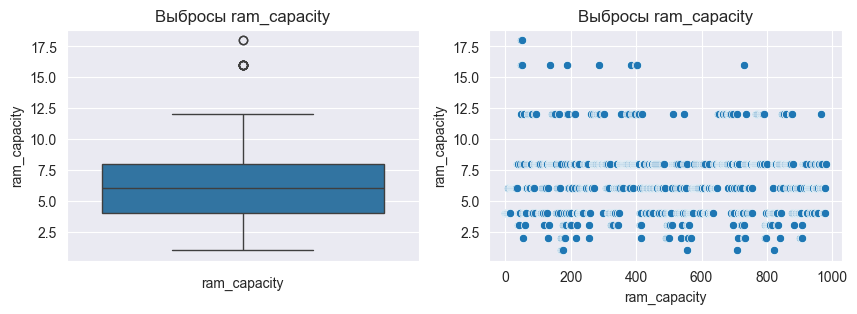

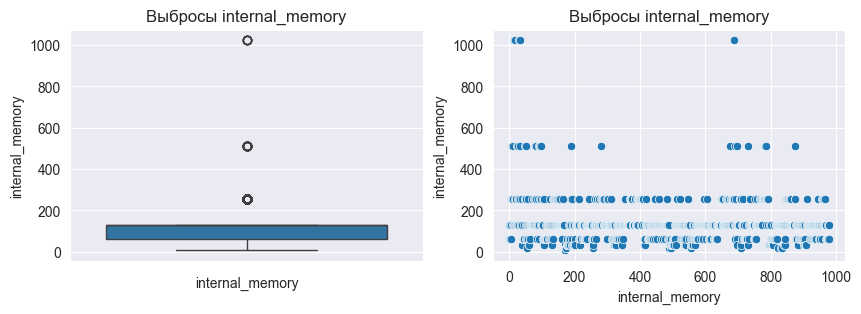

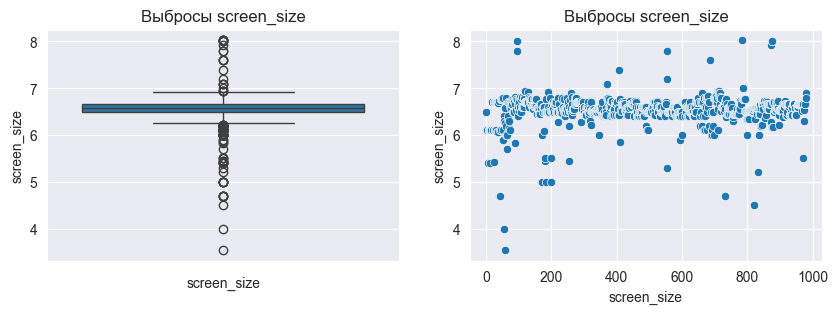

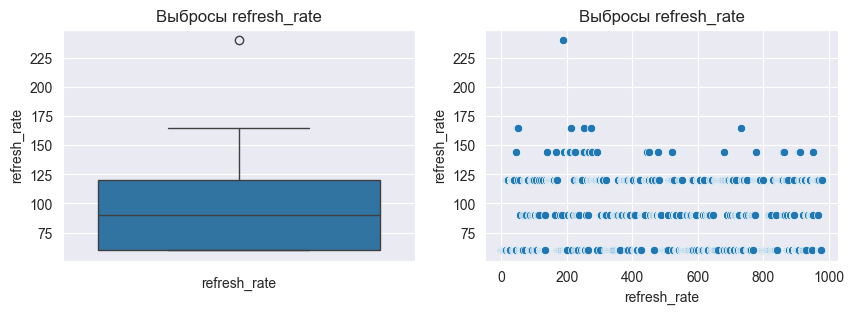

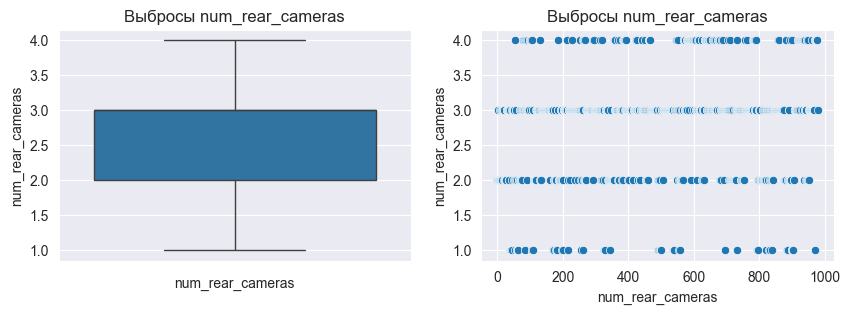

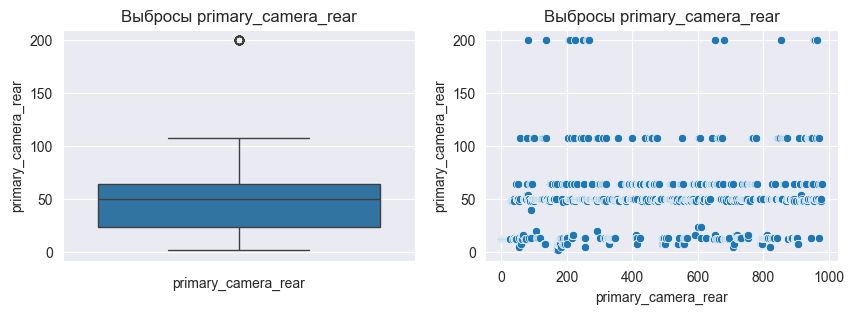

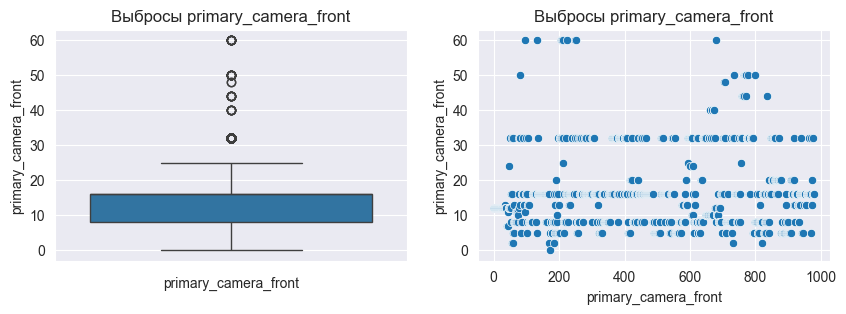

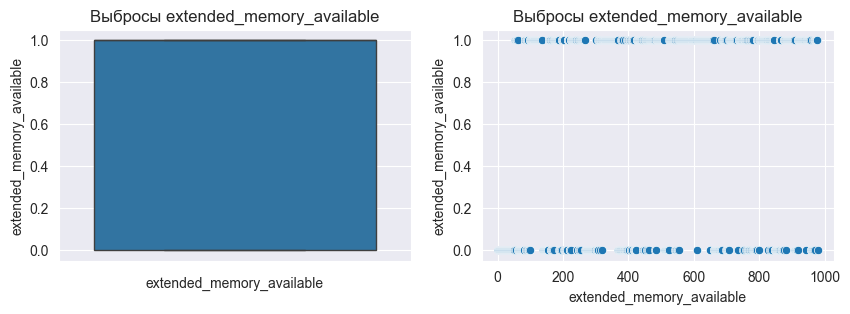

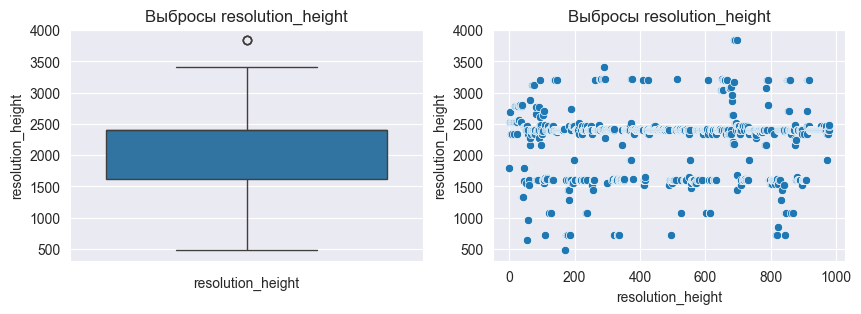

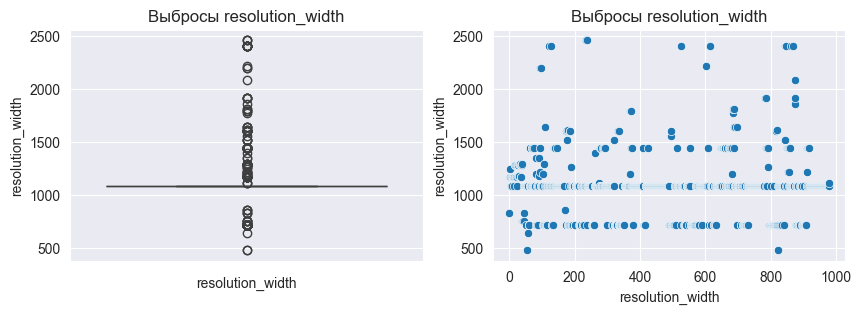

In [35]:
# Соберем названия колонок не категориальных признаков
num_col = [col for col in df.columns
               if df[col].dtypes != 'object']

for col in num_col:

    plt.figure(figsize=(10,3))

    ax1 = plt.subplot(1,2,1)
    sns.boxplot(df[col]) 
    plt.title(f"Выбросы {col}")   
    plt.xlabel(col, fontsize=10) 

    ax2 = plt.subplot(1,2,2)
    sns.scatterplot(df[col]) 
    plt.title(f'Выбросы {col}')      
    plt.xlabel(col, fontsize=10)  
    plt.show()

Проанализировав выбросы, можно сказать, что имеется их имеется довольно много. Поэтому есть необходимость их почистить, чтобы модель получилась адекватной.

Что было выброшено:
1) "price" больше 150000
2) "ram_capacity" больше 15
3) "iternal_memory" больше 600
4) "refresh_rate" больше 200
5) "fast_charging" больше 150
6) "battery_capacity" больше 7000

In [36]:
df.drop(index=df[df.price>150000].index,inplace=True)

df.drop(index=df[df.ram_capacity>15].index,inplace=True)

df.drop(index=df[df.internal_memory>600].index,inplace=True)

df.drop(index=df[df.refresh_rate>200].index,inplace=True)

df.drop(index = df[df.fast_charging > 150].index,inplace=True)

df.drop(index=df[df.battery_capacity>7000].index,inplace=True)

Посмотрим распределение цены, нужно добиться нормализации.

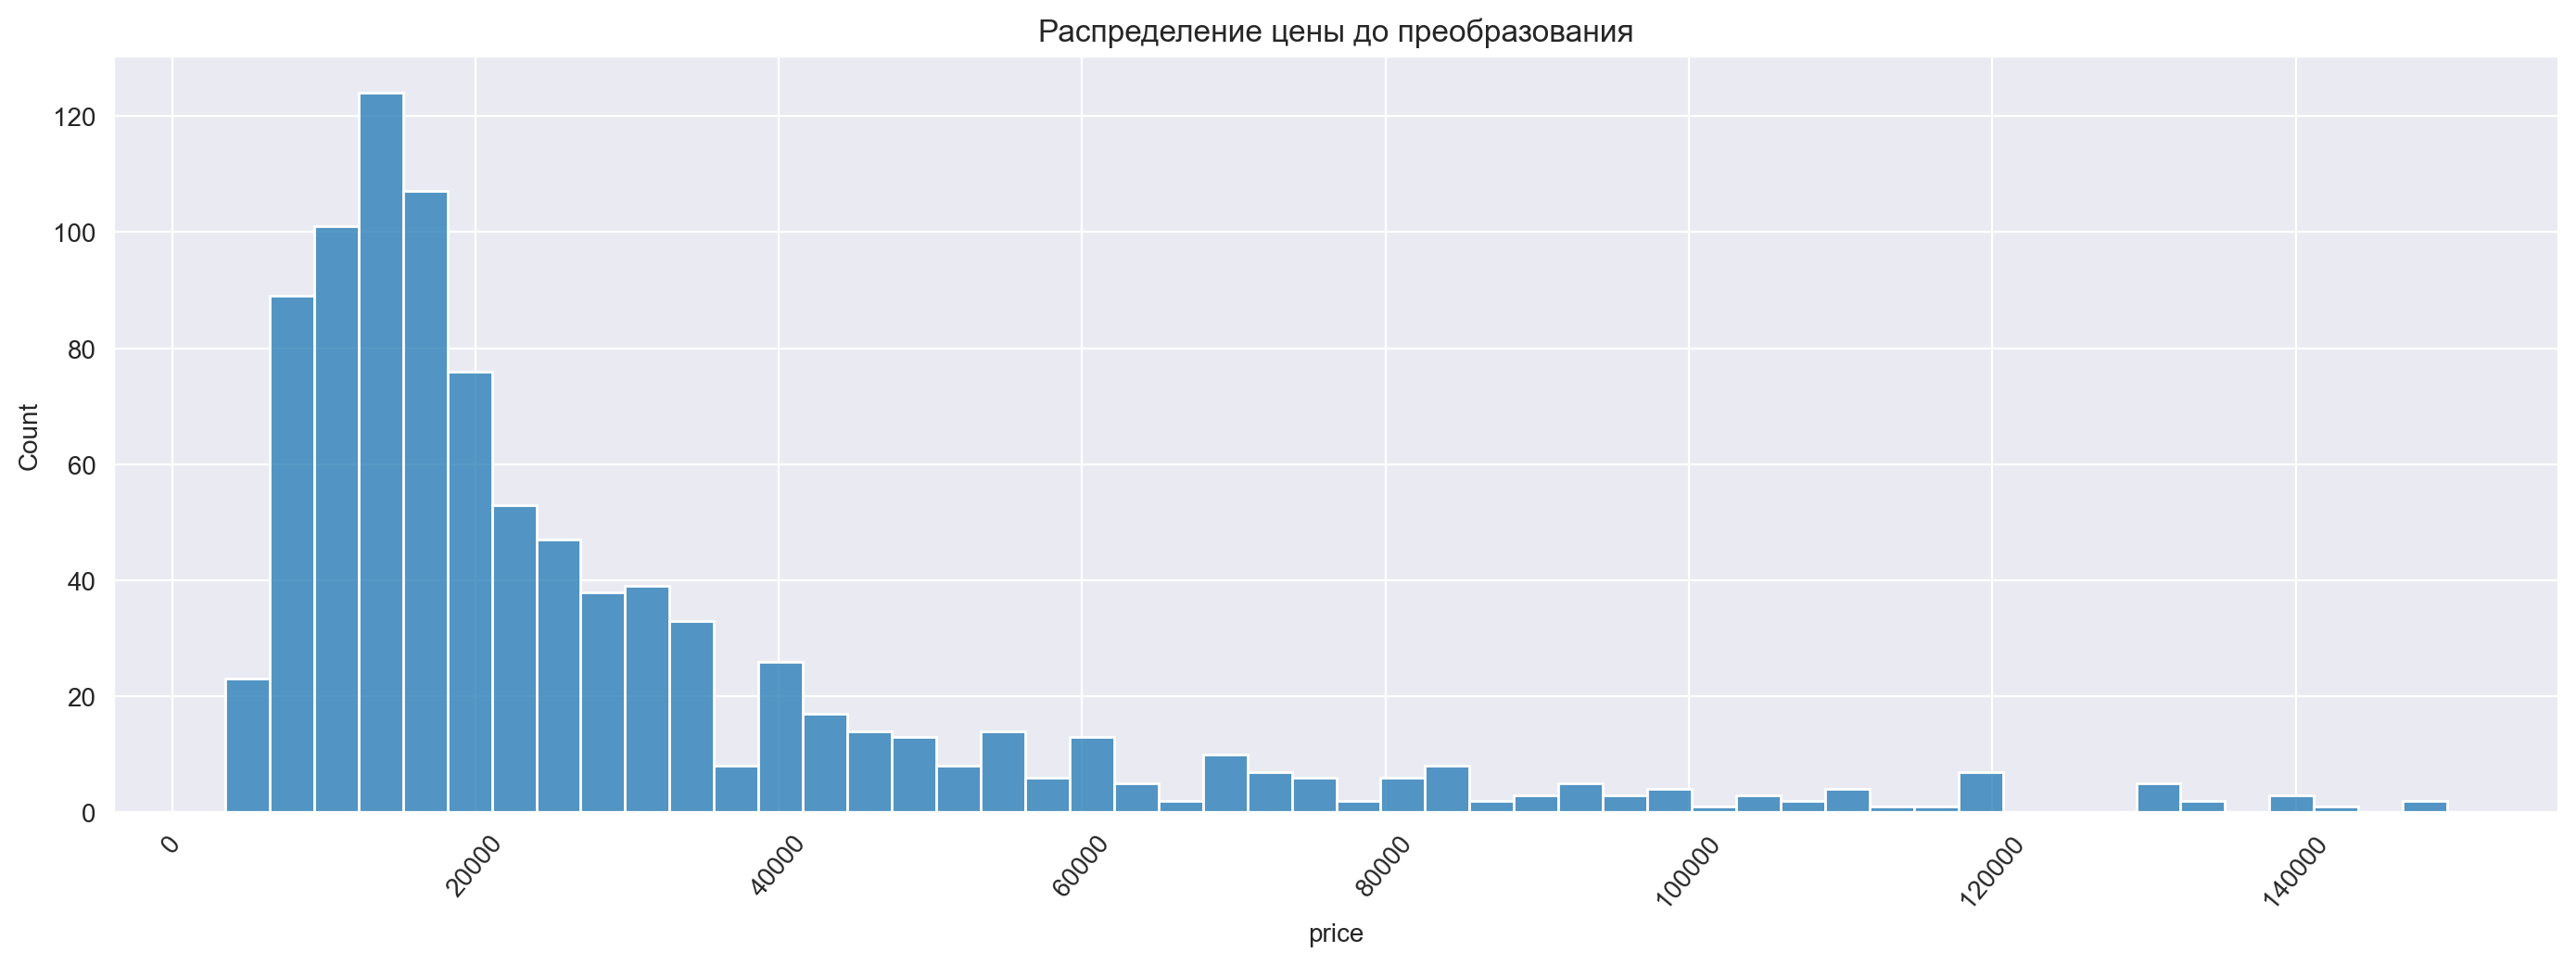

In [37]:
plt.figure(figsize=(14,5), dpi=200)
sns.histplot(data= df, x='price',bins=50)
plt.title("Распределение цены до преобразования")
plt.tight_layout()

plt.xticks(rotation=50)
plt.show()

Исходя из графика видно, что данные не нормированные, поэтому нормализуем с помощью np.log1p

In [38]:
df['price'] = np.log1p(df['price'])

Посмотрим теперь как выглядит график

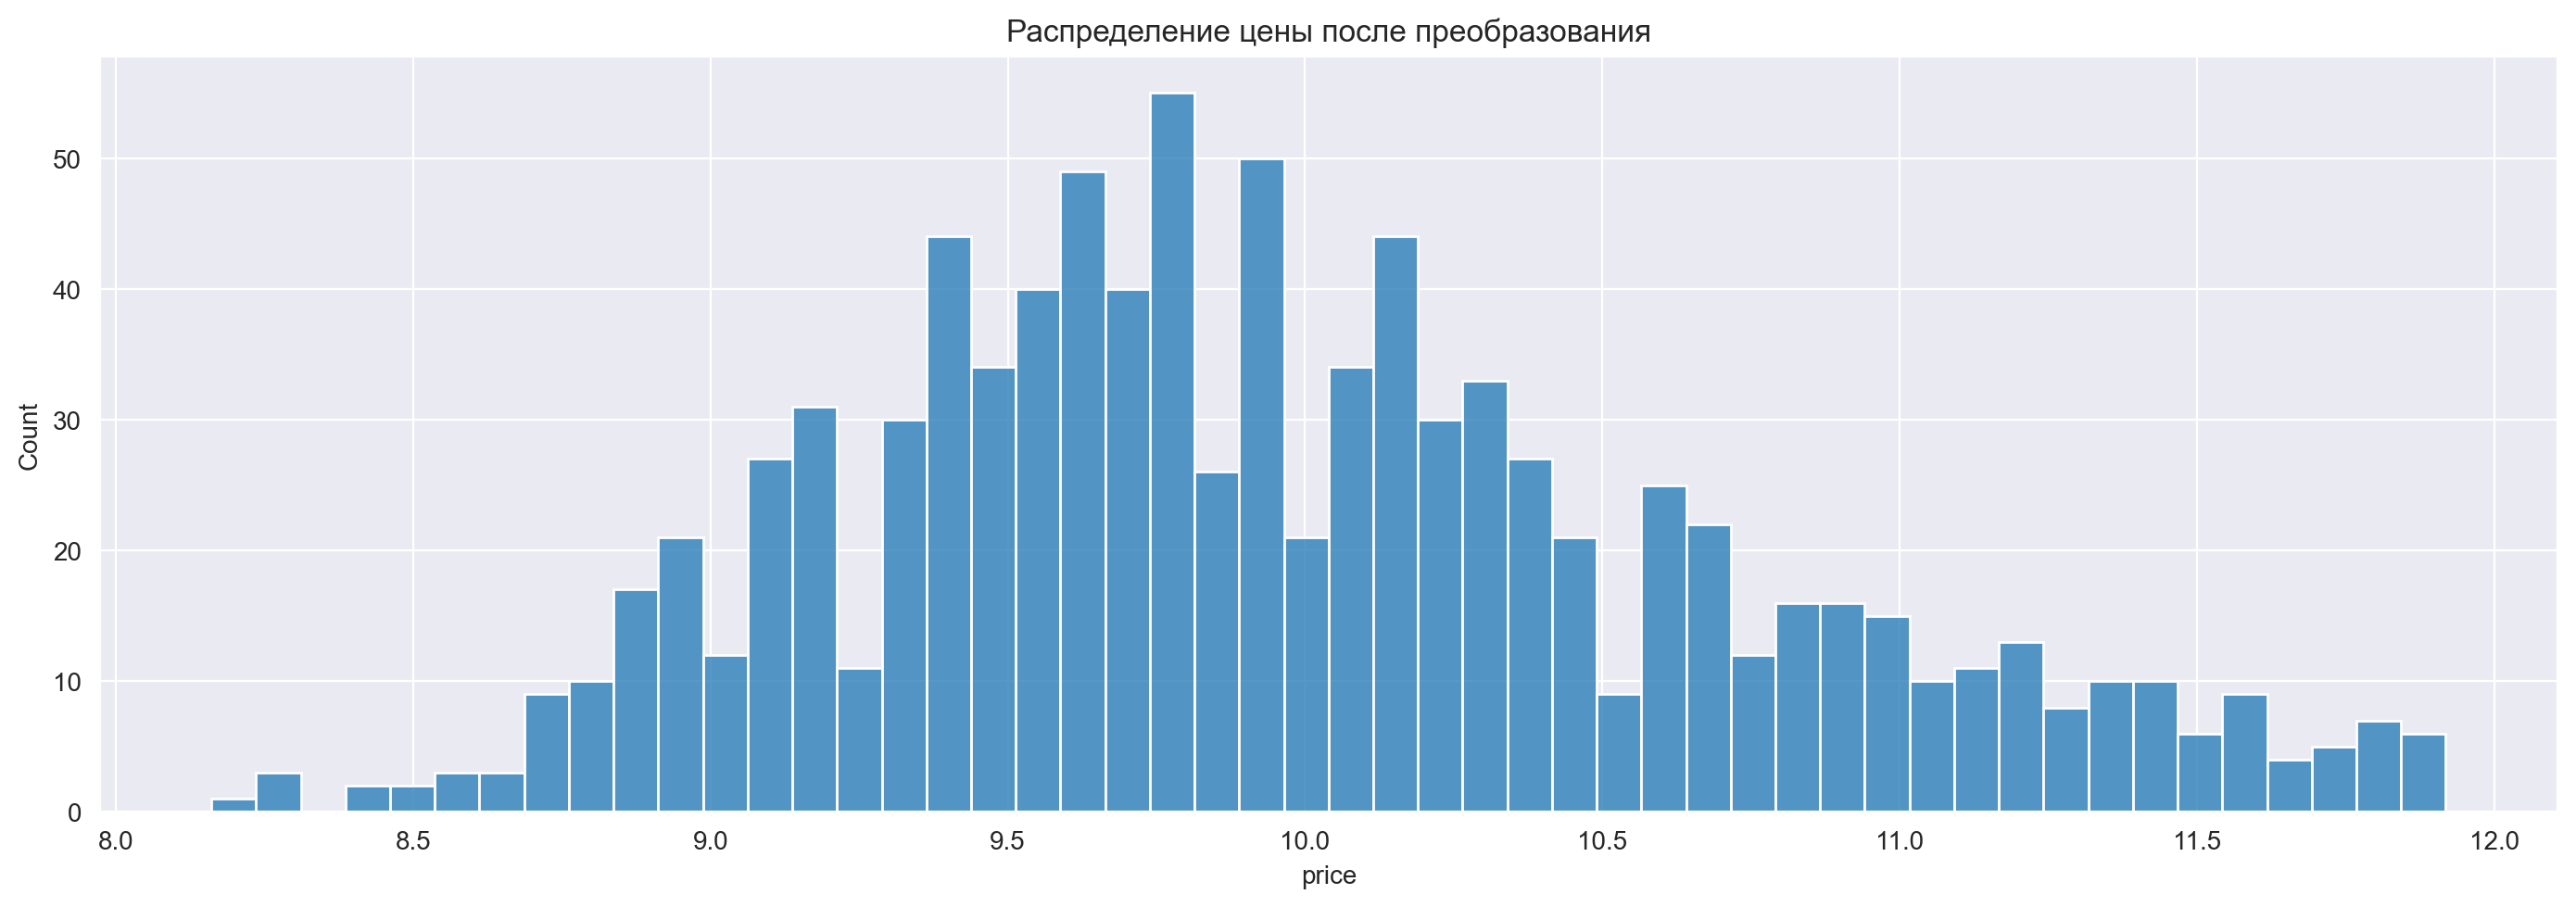

In [39]:
# Density plot for SalePrice after log transformation.
plt.figure(figsize=(14,5),dpi=200)
sns.histplot(df['price'],bins= 50)
plt.title("Распределение цены после преобразования")
plt.tight_layout()
plt.show()

Какая красота. Теперь можно приступать к заполнению пропусков. Но для начала посмотрим сколько их в каждом столбце.

In [40]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                    95
5G_or_not                      0
processor_brand               19
num_cores                      6
processor_speed               38
battery_capacity              11
fast_charging_available        0
fast_charging                202
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            10
primary_camera_rear            0
primary_camera_front           2
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

Довольно много пропусков... Но для начала:
1) Уберем лишние категориальные признаки.
2) Уберем пустые строки по признаку "processor_brand"
3) Заполним пропуски в "os" андроидом

In [41]:
df.drop(columns=['model','brand_name'],inplace = True)

df.dropna(subset=['processor_brand'],inplace=True)

df['os'].fillna('android',inplace=True)

Закодируем категориальные признаки с помощью pd.get_dummies.
Заполним пропущенные значения медианами.

In [42]:

cat_col=[col for col in df.columns
    if df[col].dtype == 'object']

encoded_df = pd.get_dummies(df,columns=cat_col,sparse=False)

impute = SimpleImputer(strategy='median')

impute.fit(encoded_df)

imputed_df = pd.DataFrame(impute.transform(encoded_df),columns=encoded_df.columns)

Построим карту корреляции каждого параметра друг с другом.

interval columns not set, guessing: ['price', 'avg_rating', '5G_or_not', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'resolution_height', 'resolution_width', 'processor_brand_bionic', 'processor_brand_dimensity', 'processor_brand_exynos', 'processor_brand_fusion', 'processor_brand_google', 'processor_brand_helio', 'processor_brand_kirin', 'processor_brand_mediatek', 'processor_brand_sc9863a', 'processor_brand_snapdragon', 'processor_brand_spreadtrum', 'processor_brand_tiger', 'processor_brand_unisoc', 'os_android', 'os_ios', 'os_other']


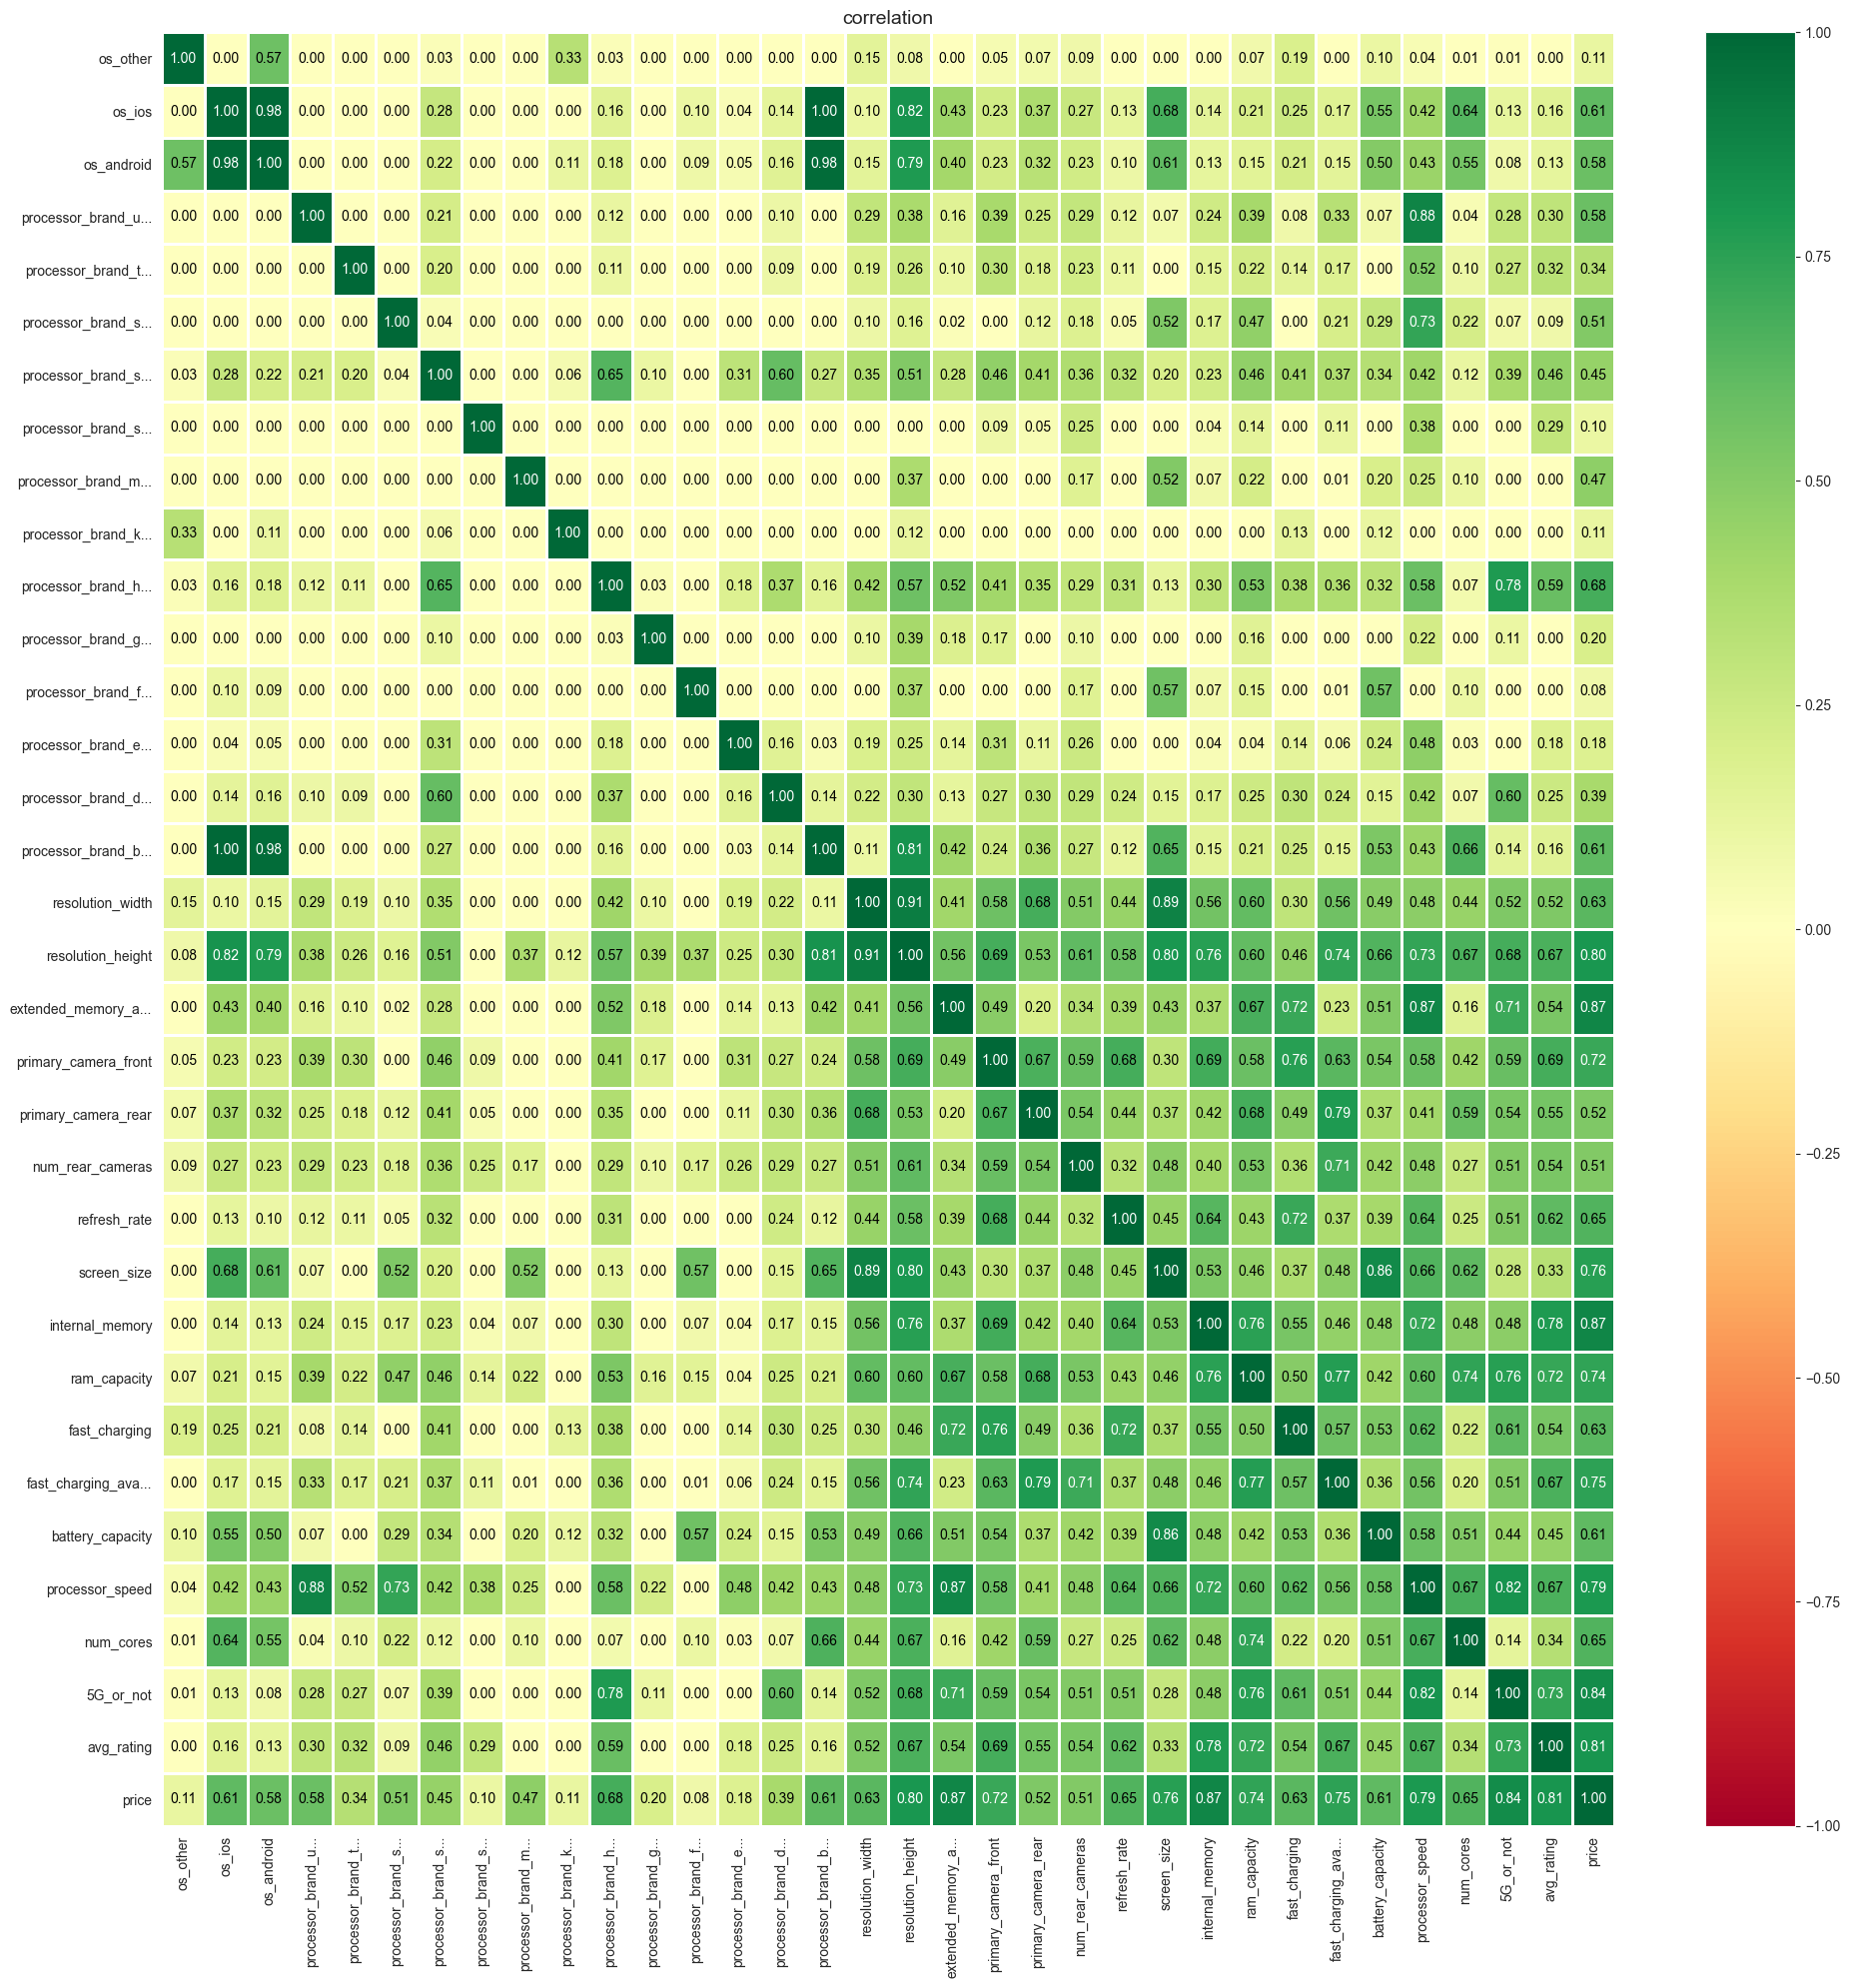

In [43]:
corr_matrix = pd.DataFrame(imputed_df.phik_matrix())

report.plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize = (20,20))

Построим график корреляции с ценой.

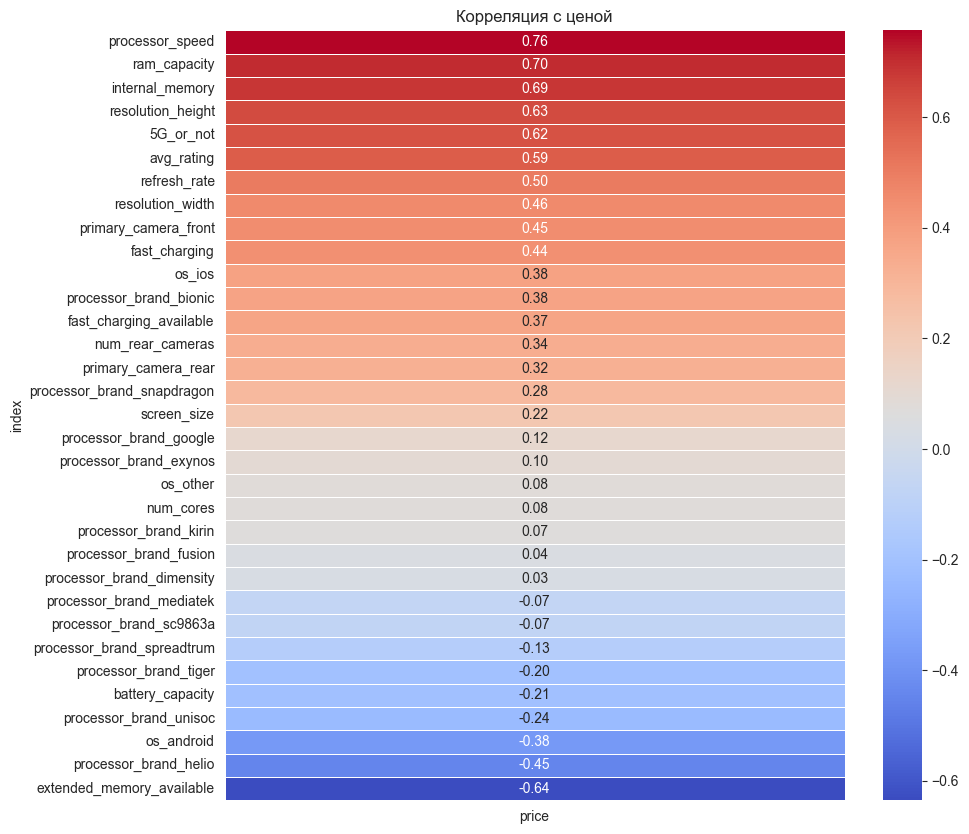

In [44]:
feature_imp = imputed_df.corr()['price'].drop('price',axis=0).reset_index()

plt.subplots(figsize = (10,10))
sns.heatmap(feature_imp.set_index('index').sort_values(by="price", ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Корреляция с ценой")
plt.show()

Удалим параметры с самой маленькой корреляцией.

In [45]:
feature_imp = feature_imp.drop(index = feature_imp.price.abs().nsmallest(5).index)


Снова отобразим.

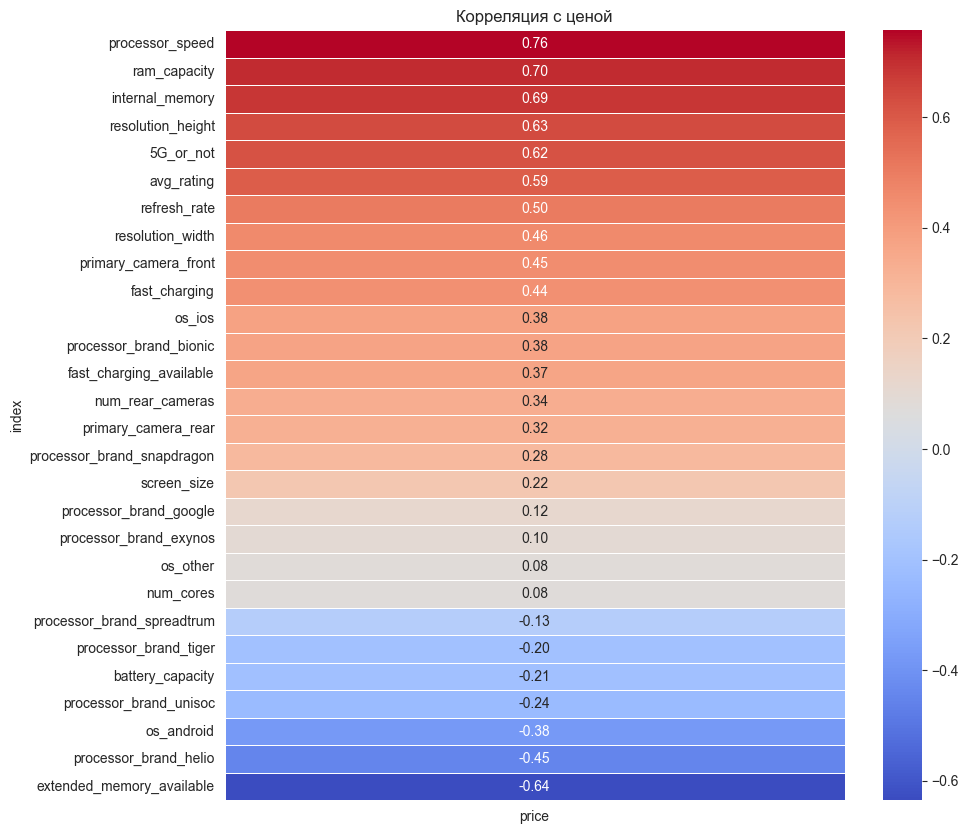

In [46]:
plt.subplots(figsize = (10,10))
sns.heatmap(feature_imp.set_index('index').sort_values(by="price", ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Корреляция с ценой")
plt.show()

Вернем все значения на свои места и начнем наконец-то машинное обучение.

In [47]:
final = imputed_df.loc[:, feature_imp['index']]
final['price'] = imputed_df['price']

Разделим DF на фичи и цель.

In [48]:
features = final.drop(columns='price')
target = final['price']

# Модели регрессии

Делим выборку на тренировочную, валидационную, тестовуюю

In [49]:
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.5, random_state=20)

features_test, features_val, target_test, target_val = train_test_split(features_temp, target_temp, test_size=0.7, random_state=20)

Выбор метрики:

Используем две метрики для оценки регрессий:
* Коэффициент детерминации
* Среднеквадратическая ошибка

Так как он показывает относительное отклонение предсказания от правильного ответа в среднем. И по ней удобно оценивать качество модели.

Так же рассмотрим среднеквадратическую ошибку, чтобы понять величину ошибки в абсолюте.

Линейная регрессия

In [50]:
lr_model = LinearRegression()

lr_model.fit(features_train,target_train)

val_pred_lr = lr_model.predict(features_val)

print(f"Валидационная выборка r2: {m.r2_score(target_val, val_pred_lr)}")
print(f"Валидационная выборка RMSE: {m.mean_absolute_error(target_val, val_pred_lr)}")

Валидационная выборка r2: 0.8676774240434536
Валидационная выборка RMSE: 0.2064413420839608


In [51]:
# xgbreg = XGBRegressor(seed=0)
# param_grid3 = {'n_estimators': [2500,1000,500,100], 
#               'learning_rate': [0.03,0.01,0.05],
#               'max_depth': [3,7,10,20],
#               'subsample': [0.8,0.2],
#               'colsample_bytree': [0.45,0.6]}
    
# xgb_model = GridSearchCV(xgbreg, param_grid3, n_jobs=1, cv=10)

# xgb_model.fit(features_train,target_train)

# xgb_model.best_params_

Градиентный спуск

In [52]:
xgb_model = XGBRegressor(n_estimators = 2500, 
                            learning_rate = 0.01,
                            max_depth = 20,
                            #objective= 'reg:squarederror',
                            reg_alpha=0.0009,
                            subsample = 0.8,
                            colsample_bytree = 0.45)

xgb_model.fit(features_train,target_train)      # Fit the model to train data

val_pred_xgb = xgb_model.predict(features_val)


print(f"Валидационная выборка r2: {m.r2_score(target_val, val_pred_xgb)}")
print(f"Валидационная выборка RMSE: {m.mean_absolute_error(target_val, val_pred_xgb)}")

Валидационная выборка r2: 0.922290296107373
Валидационная выборка RMSE: 0.15187996729161665


Случайный лес

In [53]:
# rf = RandomForestRegressor(verbose=False,random_state=42)

# param_grid2 ={'max_depth': [10, 50, 100],
#              'max_features': ['auto', 'sqrt'],
#              'min_samples_leaf': [1, 2, 4],
#              'min_samples_split': [2, 5, 10],
#              'n_estimators': [200,500],
#             'random_state':[42]}
# rf_model =GridSearchCV(rf,param_grid2,cv=5,n_jobs=1)

# rf_model.fit(features_train,target_train)

# rf_model.best_params_

In [54]:
r_model = RandomForestRegressor(max_depth = 50,
                                max_features =  'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                bootstrap= False,
                                max_leaf_nodes=200,
                                n_estimators = 500,
                                random_state = 42)

r_model.fit(features_train,target_train)   # Fit the model to train data

val_pred_rf = r_model.predict(features_val)

print(f"Валидационная выборка r2: {m.r2_score(target_val, val_pred_rf)}")
print(f"Валидационная выборка RMSE: {m.mean_absolute_error(target_val, val_pred_rf)}")

Валидационная выборка r2: 0.9162554295591335
Валидационная выборка RMSE: 0.15626039710295164


# Общий вывод:

# Вывод по моделям

| Модель | R2    | RMSE  |
|--------|-------|-------|
| Линейная регрессия  | 0.868 | 0.206 |
| Градиентный спуск    | 0.922 | 0.152 |
| Случайный лес    | 0.916 | 0.156 |


Исходя из результатов, можно сделать вывод, что самая лучшая модель это Градиентный спуск. Так как у нее самая большая точность в r2 и RMSE самый маленький.

In [55]:
print(f"Тестовая выборка r2: {m.r2_score(target_test, r_model.predict(features_test))}")

Тестовая выборка r2: 0.8914712032825207


И после проверки на тестовой выборке, она показала точность в 89.15%.

# Вывод по данным 

Данный датасет имеет много недостатков, таких как: 
* Выбросы
* Ненужные столбцы
* Ужасное распределение

Но после всех преобразований, с ним можно работать.
Достаточно много фичей коррелирует с ценой и друг другом.

In [56]:
prd = r_model.predict(features_test)
np.expm1(prd)

array([ 65471.96175494,  73404.08483315,  14674.60106801,  21193.75543666,
         8243.73718315,  98457.56083106,  59089.56993746,  31329.7369528 ,
         8639.86421064,  11933.00936435,  19717.30508429,  22192.65591176,
        31087.70333394,  19269.26379717,  17492.36161793,  28089.87774509,
        14614.04066271,  28771.68258319,  19355.43667023,  19811.11148345,
        25339.91971892,  27699.90980571,  25997.63810299,  22104.10492716,
        18738.37241499, 112041.74615113,  43640.18036946,  36393.76270907,
        10847.94576936,  24381.21355977,  29195.23626312,  10810.29145108,
        12394.28928828,   9393.66317397,  24307.44271068,  56308.8566062 ,
        93163.7938104 ,  14173.86441275,  18867.01025685,  13177.36338267,
        24283.5731954 ,  28550.40053372,  46649.66020131,  11751.37020089,
        55279.53075793,  78818.22293231,  17564.82065137,  69256.29498005,
        18552.83345289,  10200.11924323,  16184.93556374,  25432.00551253,
        64929.91713103,  